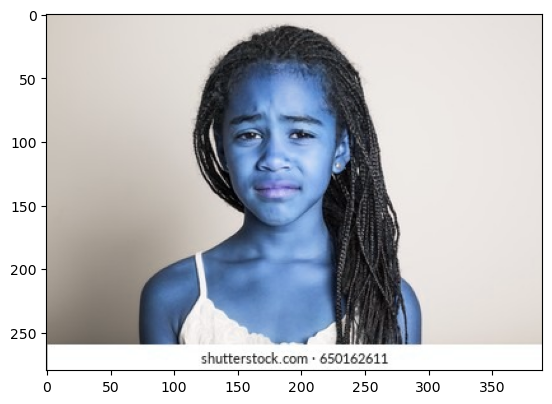

In [8]:

#importing cv2 and matplotlid
import cv2
import matplotlib.pyplot as plt
 
#loading image
img =  cv2.imread("sad_black_girl1.jpg") #loading image
 
#showing image using plt 
plt.imshow(img)

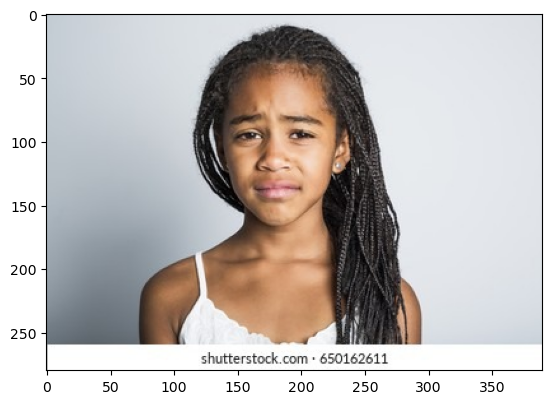

In [9]:
color_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(color_img)

In [1]:
# #importing deepface library and DeepFace
# from deepface import DeepFace
 
 
# #this analyses the given image and gives values
# #when we use this for 1st time, it may give many errors and some google drive links to download some '.h5' and zip files, download and save them in the location where it shows that files are missing.
# prediction = DeepFace.analyze(color_img)

In [10]:
from deepface import DeepFace

# Assuming color_img is your input image

# Analyze the image with enforce_detection set to False
prediction = DeepFace.analyze(color_img, enforce_detection=False)

# Check if a face was detected
if 'error' in prediction:
    print("Face could not be detected in the image.")
else:
    # Print the analysis results
    print(prediction)


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]  

[{'emotion': {'angry': 0.013020506594330072, 'disgust': 0.1566283986903727, 'fear': 7.6341331005096436, 'happy': 14.12908136844635, 'sad': 76.23313665390015, 'surprise': 0.013140347437001765, 'neutral': 1.8208593130111694}, 'dominant_emotion': 'sad', 'region': {'x': 127, 'y': 51, 'w': 111, 'h': 111}, 'face_confidence': 8.039959073241334, 'age': 20, 'gender': {'Woman': 0.11266596848145127, 'Man': 99.88732933998108}, 'dominant_gender': 'Man', 'race': {'asian': 10.318122804164886, 'indian': 20.111767947673798, 'black': 41.81717038154602, 'white': 0.720760878175497, 'middle eastern': 0.43551414273679256, 'latino hispanic': 26.596659421920776}, 'dominant_race': 'black'}]


In [11]:
#lets check what all the things DeepFace.analyze() function has analyzed 
prediction

[{'emotion': {'angry': 0.013020506594330072,
   'disgust': 0.1566283986903727,
   'fear': 7.6341331005096436,
   'happy': 14.12908136844635,
   'sad': 76.23313665390015,
   'surprise': 0.013140347437001765,
   'neutral': 1.8208593130111694},
  'dominant_emotion': 'sad',
  'region': {'x': 127, 'y': 51, 'w': 111, 'h': 111},
  'face_confidence': 8.039959073241334,
  'age': 20,
  'gender': {'Woman': 0.11266596848145127, 'Man': 99.88732933998108},
  'dominant_gender': 'Man',
  'race': {'asian': 10.318122804164886,
   'indian': 20.111767947673798,
   'black': 41.81717038154602,
   'white': 0.720760878175497,
   'middle eastern': 0.43551414273679256,
   'latino hispanic': 26.596659421920776},
  'dominant_race': 'black'}]

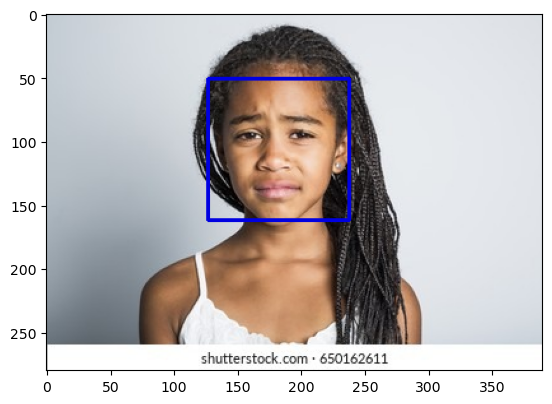

In [12]:
#loading our xml file into faceCascade using cv2.CascadeClassifier
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
 
#detecting face in color_image and getting 4 points(x,y,u,v) around face from the image, and assigning those values to 'faces' variable 
faces = faceCascade.detectMultiScale(color_img, 1.1, 4)
 
#using that 4 points to draw a rectangle around face in the image
for (x, y, u, v) in faces:
    cv2.rectangle(color_img, (x,y), (x+u, y+v), (0, 0, 225), 2)
    
plt.imshow(color_img)

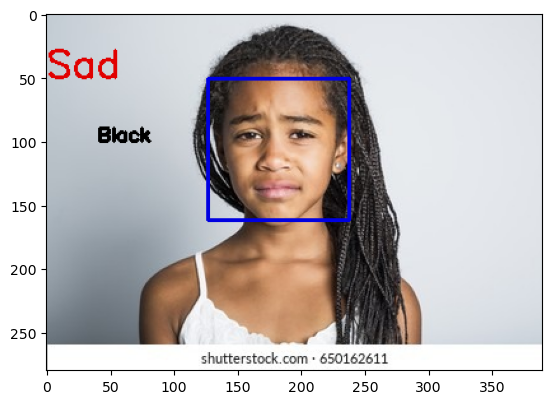

In [13]:
# Assuming prediction is a dictionary
prediction = {
    'dominant_emotion': 'Sad',
    'dominant_race': 'Black'
}

# choose font for text
font = cv2.FONT_HERSHEY_SIMPLEX

# for showing emotion on image
cv2.putText(color_img, prediction['dominant_emotion'], (0, 50), font, 1, (225,0,0), 2, cv2.LINE_4)

# for showing race on image
cv2.putText(color_img, prediction['dominant_race'], (40, 100), font, 0.5, (0,0,0), 2, cv2.LINE_4)

# finally displaying image
plt.imshow(color_img)
plt.show()